In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


EXPLORATORY DATA ANALYSIS

In [ ]:
df.isnull().head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

DATA TYPE

In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

COUNTING 1 AND 0 VALUES IN EXITED COLUMN

Exited
0    7963
1    2037
Name: count, dtype: int64


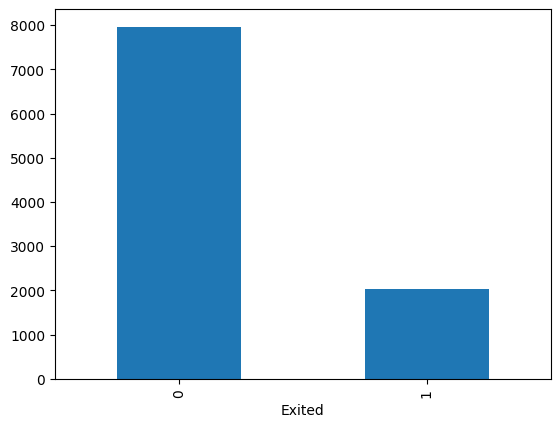

In [ ]:
colors = df["Exited"].map(lambda x: x + 1)
print(df.Exited.value_counts())
p = df.Exited.value_counts().plot(kind="bar")

CHANGE VALUES IN COUNTRY COLUMN

In [ ]:
df['Geography'] = df['Geography'].replace(['Germany'],'0')
df['Geography'] = df['Geography'].replace(['France'],'1')
df['Geography'] = df['Geography'].replace(['Spain'],'2')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,1,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,1,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,1,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,Female,43,2,125510.82,1,1,1,79084.10,0


CHANGE VALUES IN GENDER COLUMN

In [ ]:
df['Gender'] = df['Gender'].replace(['Female'],'0')
df['Gender'] = df['Gender'].replace(['Male'],'1')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


CONVERT OBJECT DATA TYPES COLUMN TO INTEGER

In [ ]:
df['Geography'] = pd.to_numeric(df['Geography'])
df['Gender'] = pd.to_numeric(df['Gender'])
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df2 = df.drop('CustomerId', axis=1)
df2.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


BUILD MACHINE LEARNING MODEL

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

In [ ]:
X = df2.drop('Exited', axis=1)
y = df2['Exited']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a transformer for one-hot encoding
# handle_unknown='ignore' tells the encoder to ignore new categories in the test set
transformer = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'  # Keep numerical columns unchanged
)

# Apply the transformation to training and test data
X_train_encoded = transformer.fit_transform(X_train)
X_test_encoded = transformer.transform(X_test)  # Use the same transformer fitted on training data

In [ ]:
# Logistic Regression model
model = LogisticRegression()
model.fit(X_train_encoded, y_train)

# Predictions
y_pred = model.predict(X_test_encoded)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

print(f'Accuracy: {accuracy}')

Validation Accuracy: 0.8035
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000

Accuracy: 0.8035


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_encoded, y_train)

# Predictions
y_pred = model.predict(X_test_encoded)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

print(f'Accuracy: {accuracy}')

Validation Accuracy: 0.799
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000

Accuracy: 0.799
